In [1]:
import urllib
import math
import time
def queryGoogleNumPages(query):
    offset = 23;
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7)Firefox/3.0.7'
    #query = "hello"
    url = "http://www.google.co.in/search?q="+ query
    headers={'User-Agent':user_agent,} 

    request=urllib.request.Request(url,None,headers) #The assembled request
    response = urllib.request.urlopen(request)
    data = str(response.read())
    #print("data",type(data))
    sIdx = data.find('id="resultStats"')
    eIdx = data[sIdx:].find(' results')
    rstring = data[sIdx+offset:sIdx+eIdx]
    out = math.log(float(rstring.replace(',','')))
    #print("out",rstring,float(rstring.replace(',','')))
    time.sleep(1)              
    return out

In [2]:
#queryGoogleNumPages("the")

23.952883758346513

In [22]:
def computeNGD(a,b):
    #no_of_webpage = math.log2(77270000000000) 
    no_of_webpage = math.log(48000000000)
    noa = queryGoogleNumPages(a)
    nob = queryGoogleNumPages(b)
    noab = queryGoogleNumPages(a+"+"+b);
    #print(max(la,lb),lab)
    #print(no_of_webpage , min(la,lb))
    NGD = (max(noa,nob) - noab)/(no_of_webpage - min(noa,nob));
    #print("NGD",NGD)
    return NGD
    

In [23]:
computeNGD("tiger","tiger")


0.06389569198955265

In [27]:
import pandas as pd
df = pd.read_csv("combined.csv")
word1=df['Word 1']
word2=df['Word 2']
NGD_Score=[]
for i in range(353):
    cngd=computeNGD(word1[i],word2[i])
    #print(word1[i],word2[i],cngd)
    NGD_Score.append(cngd)
    if i%50 ==0 or i==352:
        print(i)
    
df['NGD'] = NGD_Score
df.to_csv("result.csv")

0
50
100
150
200
250
300
350
352


In [28]:
## Question 2
#max(NGD_Score)

1.3812502109771

In [29]:
df2 = pd.read_csv("result.csv")
human=df2['Human (mean)'].values
NGD=df2['NGD'].values
NGD = [((x -min(NGD))/(max(NGD)-min(NGD)))*10 for x in NGD]
human=[10-x for x in human]


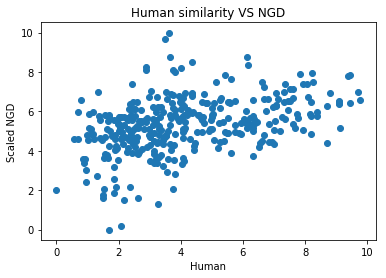

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(human,NGD, marker='o')
plt.xlabel('Human')
plt.ylabel('Scaled NGD')
plt.title("Human similarity VS NGD")
plt.savefig('ngd.png')
plt.show()